In [1]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached optuna-3.0.5-py3-none-any.whl (348 kB)
     |████████████████████████████████| 1.6 MB 13.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached alembic-1.9.2-py3-none-any.whl (210 kB)
     |████████████████████████████████| 81 kB 8.2 MB/s 
     |████████████████████████████████| 596 kB 65.6 MB/s 
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
     |████████████████████████████████| 514 kB 68.0 MB/s 
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Using cached pbr-5.11.1-py2.py3-none-any.whl (112 kB)
  Using cached autopage-0.5.1-py3-none-any.whl (29 kB)
     |████████████████████████████████| 98 kB 8.2 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
  Using cached cmd2-2.4.2-py3-none-any.whl (147 kB)
     |████████████████████████████████| 60 kB 190 kB/s 
  Using cac

In [2]:
 !pip install matplotlib==3.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 12.5 MB/s 
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
     |████████████████████████████████| 1.1 MB 61.1 MB/s 


In [3]:
#instal chembl web service package to deal with data 
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached chembl_webresource_client-0.10.8-py3-none-any.whl (55 kB)
  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  Created wheel for easydict: filename=easydict-1.10-py3-none-any.whl size=6496 sha256=f84b44644799a2c9228a919bc05bd38723778882bb4ca3c272962b29d29bca70
  Stored in directory: /root/.cache/pip/wheels/8d/d6/16/3fd964549d5c27d89d6c5fdb4306283ca55be1799f3d48a67b
Successfully built easydict
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0




# Import libraries.


In [4]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
# from matplotlib.pyplot.bar_label
import seaborn as sns;
import optuna
from scipy import stats
import glob
import random
import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import os
import pickle
# from  datasist.structdata import detect_outliers
from tqdm import tqdm
#chembl Package  
from chembl_webresource_client.new_client import new_client
# Core
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)
from datetime import date,timedelta
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Pre Processing
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Error Metrics 
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import plot_confusion_matrix
#clustring 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA
#clustring
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
seed = 42
np.random.seed =seed 


# 📌Business Goal 
 
**Drug discovery for AromataseEnzime For Breast Cancer**

# 📌 About Dataset    
## ChEMBL is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs.





#  📌Helper Function ⚒





In [7]:
#convert data frame to slower case
def lowerCase(x):
    return x.lower()

#check duplicate data 
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed . ' 
    else :
        return 'Data Is clean ,No Duplicate Data Found .'

# def car_name(x):
#     carname  = x.split(' ')[0]
#     return carname

# def car_model(x):
#     y   = x.split(' ')[1:]
#     carModel = ' '.join(y)
#     return  carModel 
            
# def getfreq(x):
#     freq = x.split(' ')[-1]
#     return freq

def calc_day_of_birth (day_num):
    today = date.today() 
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay
    
def calc_day_of_employed(day_num):
    today = date.today() 
    employedDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    result = 0
    if employedDay > date.today().strftime('%Y-%m-%d') :
         result = 0
    else:
         result = employedDay
    return result

def calculate_age(born):
    born = datetime.datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    
    
def get_appartment(x):
    if x == 'House / apartment' :
       x= x.split(' /')[0]       
    return x
    
def get_ducational_type(x):
    if x == 'Secondary / secondary special' :
       x= x.split(' /')[0]       
    return x

def get_label_for_data(x):
    target = ''
    if x in (2,3,4,5) :
       target = 'YES' #risky
    else:
         target = 'NO'  #not risky

    return target
    #draw distplot for all numeric columns just pass numerical column
def all_distplot (numCol):
    plt.figure(1 , figsize = (20 , 6))
    n = 0 
    for x in numCol:
        n += 1
        plt.subplot(1 , len(numCol) , n)
        plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
        sns.distplot(df[x] , bins = 20)
        plt.title('Distplot of {}'.format(x))
    plt.show()    
     
def box_plot(df):
    i=1
    plt.figure(figsize = (20,50))
    for col in df.columns:
        plt.subplot(round(len(df.columns)/3),3,i)
        sns.boxplot(x = df[col], data = df,width = 0.5, fliersize = 3, linewidth = 1)
        i+=1       

def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()   

def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

def plot_feature_importance (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.coef_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()
def plot_feature_importance_2 (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept
def average_plotting(df,col,output,number,title):
    data_list = df[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black") 
    plt.xticks(rotation=45);
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()
def draw_unique_value (df,title):
    plt.figure(figsize=(10,5))
    plt.title(title)
    unique_counts = df.nunique().to_dict()
    ax = sns.barplot(list(unique_counts.keys()), list(unique_counts.values()),palette='flare')
    ax.bar_label(ax.containers[0])
    plt.plot()

#  📌 Step 1 
## ***I this step we will prepare our note book using pythone code to act as website to serach four our requested enzime*** .


<h4  id="1.1-|-Serach for traget protein"><b>1.1 <span style="color:#4a8fdd">|</span> Serach for traget protein</b></h4>


In [8]:
#create an object
target = new_client.target
#prepare query for our target protien
target_query = target.search('aromatase')
#convert it to data frame  
targets = pd.DataFrame.from_dict(target_query)
targets

cross_references           organism  \
0  [{'xref_id': 'P11511', 'xref_name': None, 'xre...       Homo sapiens   
1  [{'xref_id': 'P22443', 'xref_name': None, 'xre...  Rattus norvegicus   

              pref_name  score  species_group_flag target_chembl_id  \
0  Cytochrome P450 19A1   20.0               False       CHEMBL1978   
1  Cytochrome P450 19A1   20.0               False       CHEMBL3859   

                                   target_components     target_type  tax_id  
0  [{'accession': 'P11511', 'component_descriptio...  SINGLE PROTEIN    9606  
1  [{'accession': 'P22443', 'component_descriptio...  SINGLE PROTEIN   10116


<h4  id="1.2-|-Select  which  Target will use in our Casen"><b>1.2 <span style="color:#4a8fdd">|</span> Select  which  Target will use in our Case</b></h4>

In [9]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

<h4  id="1.3-|-Get Bioactivity data"><b>1.3 <span style="color:#4a8fdd">|</span> Get Bioactivity data</b></h4>

In [10]:
#retrive biomedical activity of protien
activity = new_client.activity
response = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [11]:
df = pd.DataFrame.from_dict(response)
df.head()

activity_comment  activity_id activity_properties assay_chembl_id  \
0             None        82585                  []    CHEMBL666794   
1             None        94540                  []    CHEMBL666794   
2             None       112960                  []    CHEMBL661700   
3             None       116766                  []    CHEMBL661700   
4             None       118017                  []    CHEMBL661700   

                                   assay_description assay_type  \
0                 Inhibition of Cytochrome P450 19A1          B   
1                 Inhibition of Cytochrome P450 19A1          B   
2  In vitro inhibition of human Cytochrome P450 19A1          B   
3  In vitro inhibition of human Cytochrome P450 19A1          B   
4  In vitro inhibition of human Cytochrome P450 19A1          B   

  assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
0                    None                   None  BAO_0000190  BAO_0000357   
1                    None                   None  BAO_0000190  BAO_0000357   
2                    None                   None  BAO_0000190  BAO_0000357   
3                    None                   None  BAO_0000190  BAO_0000357   
4                    None                   None  BAO_0000190  BAO_0000357   

               bao_label                                   canonical_smiles  \
0  single protein format          CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12   
1  single protein format  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...   
2  single protein format      CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21   
3  single protein format             CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21   
4  single protein format                 Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21   

  data_validity_comment data_validity_description document_chembl_id  \
0                  None                      None      CHEMBL1133116   
1                  None                      None      CHEMBL1133116   
2                  None                      None      CHEMBL1131917   
3                  None                      None      CHEMBL1131917   
4                  None                      None      CHEMBL1131917   

           document_journal  document_year  \
0             J. Med. Chem.         2000.0   
1             J. Med. Chem.         2000.0   
2  Bioorg. Med. Chem. Lett.         1999.0   
3  Bioorg. Med. Chem. Lett.         1999.0   
4  Bioorg. Med. Chem. Lett.         1999.0   

                                   ligand_efficiency molecule_chembl_id  \
0  {'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...       CHEMBL341591   
1                                               None      CHEMBL2111947   
2  {'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...       CHEMBL431859   
3  {'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...       CHEMBL113637   
4  {'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...       CHEMBL112021   

  molecule_pref_name parent_molecule_chembl_id pchembl_value  \
0               None              CHEMBL341591          5.15   
1               None             CHEMBL2111947          None   
2               None              CHEMBL431859          6.62   
3               None              CHEMBL113637          7.24   
4               None              CHEMBL112021          7.27   

   potential_duplicate                                 qudt_units  record_id  \
0                    0  http://www.openphacts.org/units/Nanomolar     267172   
1                    0  http://www.openphacts.org/units/Nanomolar     267163   
2                    0  http://www.openphacts.org/units/Nanomolar     214178   
3                    0  http://www.openphacts.org/units/Nanomolar     214179   
4                    0  http://www.openphacts.org/units/Nanomolar     214173   

  relation  src_id  standard_flag standard_relation standard_text_value  \
0        =       1              1                 =                None   
1        >       1              1                 >

In [12]:
df.shape

(2912, 45)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2912 entries, 0 to 2911
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_comment           94 non-null     object 
 1   activity_id                2912 non-null   int64  
 2   activity_properties        2912 non-null   object 
 3   assay_chembl_id            2912 non-null   object 
 4   assay_description          2912 non-null   object 
 5   assay_type                 2912 non-null   object 
 6   assay_variant_accession    0 non-null      object 
 7   assay_variant_mutation     0 non-null      object 
 8   bao_endpoint               2912 non-null   object 
 9   bao_format                 2912 non-null   object 
 10  bao_label                  2912 non-null   object 
 11  canonical_smiles           2912 non-null   object 
 12  data_validity_comment      128 non-null    object 
 13  data_validity_description  128 non-null    objec

### standard value **refere to the potency of the drug the lower of its value is the higher of potency of drugs** 


In [14]:
# save data frame 
df.to_csv('/content/drive/MyDrive/datasets/bioactvitydata-omdin/bioactvity_data.csv',index=False)

# 📌 Step 2 
Data Preprocessing 
* Handel Missing Data 
* Data Labeling

<h4  id="2.1-|-Handel Missing Data"><b>2.1 <span style="color:#4a8fdd">|</span> Handel Missing Data</b></h4>

In [15]:
# check missing Value  in [standard_value,canonical_smiles]
df.isnull().sum().sort_values(ascending=False)[['standard_value','canonical_smiles']]

standard_value      76
canonical_smiles     0
dtype: int64

In [16]:
df

activity_comment  activity_id activity_properties assay_chembl_id  \
0                None        82585                  []    CHEMBL666794   
1                None        94540                  []    CHEMBL666794   
2                None       112960                  []    CHEMBL661700   
3                None       116766                  []    CHEMBL661700   
4                None       118017                  []    CHEMBL661700   
...               ...          ...                 ...             ...   
2907             None     23277437                  []   CHEMBL4836470   
2908             None     23277438                  []   CHEMBL4836470   
2909             None     23277439                  []   CHEMBL4836470   
2910             None     23277440                  []   CHEMBL4836470   
2911             None     23277441                  []   CHEMBL4836470   

                                      assay_description assay_type  \
0                    Inhibition of Cytochrome P450 19A1          B   
1                    Inhibition of Cytochrome P450 19A1          B   
2     In vitro inhibition of human Cytochrome P450 19A1          B   
3     In vitro inhibition of human Cytochrome P450 19A1          B   
4     In vitro inhibition of human Cytochrome P450 19A1          B   
...                                                 ...        ...   
2907           Inhibition of aromatase (unknown origin)          B   
2908           Inhibition of aromatase (unknown origin)          B   
2909           Inhibition of aromatase (unknown origin)          B   
2910           Inhibition of aromatase (unknown origin)          B   
2911           Inhibition of aromatase (unknown origin)          B   

     assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
0                       None                   None  BAO_0000190  BAO_0000357   
1                       None                   None  BAO_0000190  BAO_0000357   
2                       None                   None  BAO_0000190  BAO_0000357   
3                       None                   None  BAO_0000190  BAO_0000357   
4                       None                   None  BAO_0000190  BAO_0000357   
...                      ...                    ...          ...          ...   
2907                    None                   None  BAO_0000190  BAO_0000357   
2908                    None                   None  BAO_0000190  BAO_0000357   
2909                    None                   None  BAO_0000190  BAO_0000357   
2910                    None                   None  BAO_0000190  BAO_0000357   
2911                    None                   None  BAO_0000190  BAO_0000357   

                  bao_label  \
0     single protein format   
1     single protein format   
2     single protein format   
3     single protein format   
4     single protein format   
...                     ...   
2907  single protein format   
2908  single protein format   
2909  single protein format   
2910  single protein format   
2911  single protein format   

                                       canonical_smiles data_validity_comment  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12                  None   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...                  None   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21                  None   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21                  None   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21                  None   
...                                                 ...                   ...   
2907  C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...                  None   
2908       CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C                  None   
2909  CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...                  None   
2910  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...                  None   
2911               N#Cc1ccc(C(c2ccc(C#

In [17]:
# i will drop any non value in [standard_value,canonical_smiles]
df2 = df[df['standard_value'].notnull()]
df2 

activity_comment  activity_id activity_properties assay_chembl_id  \
0                None        82585                  []    CHEMBL666794   
1                None        94540                  []    CHEMBL666794   
2                None       112960                  []    CHEMBL661700   
3                None       116766                  []    CHEMBL661700   
4                None       118017                  []    CHEMBL661700   
...               ...          ...                 ...             ...   
2907             None     23277437                  []   CHEMBL4836470   
2908             None     23277438                  []   CHEMBL4836470   
2909             None     23277439                  []   CHEMBL4836470   
2910             None     23277440                  []   CHEMBL4836470   
2911             None     23277441                  []   CHEMBL4836470   

                                      assay_description assay_type  \
0                    Inhibition of Cytochrome P450 19A1          B   
1                    Inhibition of Cytochrome P450 19A1          B   
2     In vitro inhibition of human Cytochrome P450 19A1          B   
3     In vitro inhibition of human Cytochrome P450 19A1          B   
4     In vitro inhibition of human Cytochrome P450 19A1          B   
...                                                 ...        ...   
2907           Inhibition of aromatase (unknown origin)          B   
2908           Inhibition of aromatase (unknown origin)          B   
2909           Inhibition of aromatase (unknown origin)          B   
2910           Inhibition of aromatase (unknown origin)          B   
2911           Inhibition of aromatase (unknown origin)          B   

     assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
0                       None                   None  BAO_0000190  BAO_0000357   
1                       None                   None  BAO_0000190  BAO_0000357   
2                       None                   None  BAO_0000190  BAO_0000357   
3                       None                   None  BAO_0000190  BAO_0000357   
4                       None                   None  BAO_0000190  BAO_0000357   
...                      ...                    ...          ...          ...   
2907                    None                   None  BAO_0000190  BAO_0000357   
2908                    None                   None  BAO_0000190  BAO_0000357   
2909                    None                   None  BAO_0000190  BAO_0000357   
2910                    None                   None  BAO_0000190  BAO_0000357   
2911                    None                   None  BAO_0000190  BAO_0000357   

                  bao_label  \
0     single protein format   
1     single protein format   
2     single protein format   
3     single protein format   
4     single protein format   
...                     ...   
2907  single protein format   
2908  single protein format   
2909  single protein format   
2910  single protein format   
2911  single protein format   

                                       canonical_smiles data_validity_comment  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12                  None   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...                  None   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21                  None   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21                  None   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21                  None   
...                                                 ...                   ...   
2907  C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...                  None   
2908       CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C                  None   
2909  CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...                  None   
2910  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...                  None   
2911               N#Cc1ccc(C(c2ccc(C#

In [18]:
df2.reset_index(inplace = True)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      2836 non-null   int64  
 1   activity_comment           18 non-null     object 
 2   activity_id                2836 non-null   int64  
 3   activity_properties        2836 non-null   object 
 4   assay_chembl_id            2836 non-null   object 
 5   assay_description          2836 non-null   object 
 6   assay_type                 2836 non-null   object 
 7   assay_variant_accession    0 non-null      object 
 8   assay_variant_mutation     0 non-null      object 
 9   bao_endpoint               2836 non-null   object 
 10  bao_format                 2836 non-null   object 
 11  bao_label                  2836 non-null   object 
 12  canonical_smiles           2836 non-null   object 
 13  data_validity_comment      128 non-null    objec

In [20]:
df2

index activity_comment  activity_id activity_properties assay_chembl_id  \
0         0             None        82585                  []    CHEMBL666794   
1         1             None        94540                  []    CHEMBL666794   
2         2             None       112960                  []    CHEMBL661700   
3         3             None       116766                  []    CHEMBL661700   
4         4             None       118017                  []    CHEMBL661700   
...     ...              ...          ...                 ...             ...   
2831   2907             None     23277437                  []   CHEMBL4836470   
2832   2908             None     23277438                  []   CHEMBL4836470   
2833   2909             None     23277439                  []   CHEMBL4836470   
2834   2910             None     23277440                  []   CHEMBL4836470   
2835   2911             None     23277441                  []   CHEMBL4836470   

                                      assay_description assay_type  \
0                    Inhibition of Cytochrome P450 19A1          B   
1                    Inhibition of Cytochrome P450 19A1          B   
2     In vitro inhibition of human Cytochrome P450 19A1          B   
3     In vitro inhibition of human Cytochrome P450 19A1          B   
4     In vitro inhibition of human Cytochrome P450 19A1          B   
...                                                 ...        ...   
2831           Inhibition of aromatase (unknown origin)          B   
2832           Inhibition of aromatase (unknown origin)          B   
2833           Inhibition of aromatase (unknown origin)          B   
2834           Inhibition of aromatase (unknown origin)          B   
2835           Inhibition of aromatase (unknown origin)          B   

     assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
0                       None                   None  BAO_0000190  BAO_0000357   
1                       None                   None  BAO_0000190  BAO_0000357   
2                       None                   None  BAO_0000190  BAO_0000357   
3                       None                   None  BAO_0000190  BAO_0000357   
4                       None                   None  BAO_0000190  BAO_0000357   
...                      ...                    ...          ...          ...   
2831                    None                   None  BAO_0000190  BAO_0000357   
2832                    None                   None  BAO_0000190  BAO_0000357   
2833                    None                   None  BAO_0000190  BAO_0000357   
2834                    None                   None  BAO_0000190  BAO_0000357   
2835                    None                   None  BAO_0000190  BAO_0000357   

                  bao_label  \
0     single protein format   
1     single protein format   
2     single protein format   
3     single protein format   
4     single protein format   
...                     ...   
2831  single protein format   
2832  single protein format   
2833  single protein format   
2834  single protein format   
2835  single protein format   

                                       canonical_smiles data_validity_comment  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12                  None   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...                  None   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21                  None   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21                  None   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21                  None   
...                                                 ...                   ...   
2831  C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...                  None   
2832       CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C                  None   
2833  CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...                  None   
2834  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(

<h4  id="2.2-|-Data Labeling "><b>2.2 <span style="color:#4a8fdd">|</span> Data Labeling</b></h4>

In [21]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

<h4  id="2.3-|-Collecting Data"><b>2.3 <span style="color:#4a8fdd">|</span>  Collecting Data</b></h4>


1.  **Molecure is chemical strcure that produce  modlatory activity ,it exerts some effect on protien** .

2.   **Drug will act dirictly on target protien in order to produce desired bilogical effect**
3.   **Each compound will describe by molecure cahmbel id** 





In [22]:
#collect [molecule_chembl_id,standard_value,canonical_smiles,classes] in one data frame
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3 =pd.concat([df3,pd.Series(bioactivity_class,name='class')],axis=1)
df3

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL341591          CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12   
1         CHEMBL2111947  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...   
2          CHEMBL431859      CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21   
3          CHEMBL113637             CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21   
4          CHEMBL112021                 Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21   
...                 ...                                                ...   
2831      CHEMBL4874928  C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...   
2832      CHEMBL4852023       CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C   
2833           CHEMBL75  CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...   
2834      CHEMBL1200374  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...   
2835         CHEMBL1444               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1   

     standard_value         class  
0            7100.0  intermediate  
1           50000.0      inactive  
2             238.0        active  
3              57.0        active  
4              54.0        active  
...             ...           ...  
2831         7900.0  intermediate  
2832         3700.0  intermediate  
2833         2400.0  intermediate  
2834           23.0        active  
2835            1.0        active  

[2836 rows x 4 columns]

In [23]:
df2.pop('index')
df2.head()

activity_comment  activity_id activity_properties assay_chembl_id  \
0             None        82585                  []    CHEMBL666794   
1             None        94540                  []    CHEMBL666794   
2             None       112960                  []    CHEMBL661700   
3             None       116766                  []    CHEMBL661700   
4             None       118017                  []    CHEMBL661700   

                                   assay_description assay_type  \
0                 Inhibition of Cytochrome P450 19A1          B   
1                 Inhibition of Cytochrome P450 19A1          B   
2  In vitro inhibition of human Cytochrome P450 19A1          B   
3  In vitro inhibition of human Cytochrome P450 19A1          B   
4  In vitro inhibition of human Cytochrome P450 19A1          B   

  assay_variant_accession assay_variant_mutation bao_endpoint   bao_format  \
0                    None                   None  BAO_0000190  BAO_0000357   
1                    None                   None  BAO_0000190  BAO_0000357   
2                    None                   None  BAO_0000190  BAO_0000357   
3                    None                   None  BAO_0000190  BAO_0000357   
4                    None                   None  BAO_0000190  BAO_0000357   

               bao_label                                   canonical_smiles  \
0  single protein format          CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12   
1  single protein format  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...   
2  single protein format      CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21   
3  single protein format             CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21   
4  single protein format                 Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21   

  data_validity_comment data_validity_description document_chembl_id  \
0                  None                      None      CHEMBL1133116   
1                  None                      None      CHEMBL1133116   
2                  None                      None      CHEMBL1131917   
3                  None                      None      CHEMBL1131917   
4                  None                      None      CHEMBL1131917   

           document_journal  document_year  \
0             J. Med. Chem.         2000.0   
1             J. Med. Chem.         2000.0   
2  Bioorg. Med. Chem. Lett.         1999.0   
3  Bioorg. Med. Chem. Lett.         1999.0   
4  Bioorg. Med. Chem. Lett.         1999.0   

                                   ligand_efficiency molecule_chembl_id  \
0  {'bei': '15.62', 'le': '0.29', 'lle': '0.86', ...       CHEMBL341591   
1                                               None      CHEMBL2111947   
2  {'bei': '16.06', 'le': '0.35', 'lle': '0.91', ...       CHEMBL431859   
3  {'bei': '22.68', 'le': '0.41', 'lle': '2.61', ...       CHEMBL113637   
4  {'bei': '22.58', 'le': '0.43', 'lle': '2.68', ...       CHEMBL112021   

  molecule_pref_name parent_molecule_chembl_id pchembl_value  \
0               None              CHEMBL341591          5.15   
1               None             CHEMBL2111947          None   
2               None              CHEMBL431859          6.62   
3               None              CHEMBL113637          7.24   
4               None              CHEMBL112021          7.27   

   potential_duplicate                                 qudt_units  record_id  \
0                    0  http://www.openphacts.org/units/Nanomolar     267172   
1                    0  http://www.openphacts.org/units/Nanomolar     267163   
2                    0  http://www.openphacts.org/units/Nanomolar     214178   
3                    0  http://www.openphacts.org/units/Nanomolar     214179   
4                    0  http://www.openphacts.org/units/Nanomolar     214173   

  relation  src_id  standard_flag standard_relation standard_text_value  \
0        =       1              1                 =                None   
1        >       1              1                 >

In [24]:
#remove null datata in class
# df3 = df3[df3['class'].notnull()]
# df3 =df3[df3['standard_value'].notnull()]
# df3 =df3[df3['canonical_smiles'].notnull()]
# df3

In [25]:
# save data set 
df3.to_csv('/content/drive/MyDrive/datasets/bioactvitydata-omdin/bioactvity_processed_data.csv',index=False)

#  📌 Step 3


1.  instaling rdkit and conda
rdkit is allow to calculate moelouicure describtors for the compounds in the dataset for the compounds




In [26]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-01-15 12:41:44--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   310MB/s    in 0.3s    

2023-01-15 12:41:44 (310 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::libdeflate==1.8=h7f8727e_5
  - defaults/linux-64::lz4-c==1.9.4=h6a678d5_0
  - defaults/linux-64::ruamel.yaml==0.17.21=py37h5eee18b_0
  - defaul

<h4 id="1.2-|-dataset shape"><b>3.1 <span style="color:#4a8fdd">|</span>  Calculate Lipinski Descriptors</b></h4>


*   Lipinski Descriptors is evaluating the druglikeness of compounds. Such druglikeness is based on the **Absorption,** **Distribution**, **Metabolism** and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10











In [27]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [28]:
new_df = df3.copy()

In [29]:

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

In [30]:
df_lipinski = lipinski(new_df.canonical_smiles)
df_lipinski

MW     LogP  NumHDonors  NumHAcceptors
0     329.528  4.28820         2.0            2.0
1     315.501  3.89810         2.0            2.0
2     412.306  5.70542         0.0            3.0
3     319.383  4.63450         0.0            3.0
4     321.811  4.58780         0.0            3.0
...       ...      ...         ...            ...
2831  286.459  5.46460         0.0            1.0
2832  286.459  5.54580         1.0            1.0
2833  531.440  4.20580         0.0            7.0
2834  296.410  4.02950         0.0            2.0
2835  285.310  2.65916         0.0            5.0

[2836 rows x 4 columns]

<h4 id="3.2-|-dataset shape"><b>3.2 <span style="color:#4a8fdd">|</span>  merge our data</b></h4>

In [31]:
merged_df = pd.concat([df_lipinski,new_df],axis=1)
merged_df

MW     LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
0     329.528  4.28820         2.0            2.0       CHEMBL341591   
1     315.501  3.89810         2.0            2.0      CHEMBL2111947   
2     412.306  5.70542         0.0            3.0       CHEMBL431859   
3     319.383  4.63450         0.0            3.0       CHEMBL113637   
4     321.811  4.58780         0.0            3.0       CHEMBL112021   
...       ...      ...         ...            ...                ...   
2831  286.459  5.46460         0.0            1.0      CHEMBL4874928   
2832  286.459  5.54580         1.0            1.0      CHEMBL4852023   
2833  531.440  4.20580         0.0            7.0           CHEMBL75   
2834  296.410  4.02950         0.0            2.0      CHEMBL1200374   
2835  285.310  2.65916         0.0            5.0         CHEMBL1444   

                                       canonical_smiles standard_value  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12         7100.0   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...        50000.0   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21          238.0   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21           57.0   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21           54.0   
...                                                 ...            ...   
2831  C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...         7900.0   
2832       CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C         3700.0   
2833  CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...         2400.0   
2834  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...           23.0   
2835               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1            1.0   

             class  
0     intermediate  
1         inactive  
2           active  
3           active  
4           active  
...            ...  
2831  intermediate  
2832  intermediate  
2833  intermediate  
2834        active  
2835        active  

[2836 rows x 8 columns]

In [32]:
#delete null column 
merged_df =merged_df[merged_df['MW'].notnull()]
merged_df =merged_df[merged_df['LogP'].notnull()]
merged_df =merged_df[merged_df['NumHDonors'].notnull()]
merged_df =merged_df[merged_df['NumHAcceptors'].notnull()]
merged_df

MW     LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
0     329.528  4.28820         2.0            2.0       CHEMBL341591   
1     315.501  3.89810         2.0            2.0      CHEMBL2111947   
2     412.306  5.70542         0.0            3.0       CHEMBL431859   
3     319.383  4.63450         0.0            3.0       CHEMBL113637   
4     321.811  4.58780         0.0            3.0       CHEMBL112021   
...       ...      ...         ...            ...                ...   
2831  286.459  5.46460         0.0            1.0      CHEMBL4874928   
2832  286.459  5.54580         1.0            1.0      CHEMBL4852023   
2833  531.440  4.20580         0.0            7.0           CHEMBL75   
2834  296.410  4.02950         0.0            2.0      CHEMBL1200374   
2835  285.310  2.65916         0.0            5.0         CHEMBL1444   

                                       canonical_smiles standard_value  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12         7100.0   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...        50000.0   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21          238.0   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21           57.0   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21           54.0   
...                                                 ...            ...   
2831  C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...         7900.0   
2832       CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C         3700.0   
2833  CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...         2400.0   
2834  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...           23.0   
2835               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1            1.0   

             class  
0     intermediate  
1         inactive  
2           active  
3           active  
4           active  
...            ...  
2831  intermediate  
2832  intermediate  
2833  intermediate  
2834        active  
2835        active  

[2836 rows x 8 columns]

<h4 id="3.2-|-Data Normalizaton"><b>3.2 <span style="color:#4a8fdd">|</span>  Data Normalizaton</b></h4>


*  Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column






In [33]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [34]:
def norm_value(input):
    norm = []

    for i in input['standard_value'].astype(float):
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

<h4 id="3.3-|-Convert IC50 to pIC50"><b>3.3 <span style="color:#4a8fdd">|</span>  Convert IC50 to pIC50</b></h4>






In [35]:
#apply normalization
df_norm = norm_value(merged_df)
df_norm

MW     LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
0     329.528  4.28820         2.0            2.0       CHEMBL341591   
1     315.501  3.89810         2.0            2.0      CHEMBL2111947   
2     412.306  5.70542         0.0            3.0       CHEMBL431859   
3     319.383  4.63450         0.0            3.0       CHEMBL113637   
4     321.811  4.58780         0.0            3.0       CHEMBL112021   
...       ...      ...         ...            ...                ...   
2831  286.459  5.46460         0.0            1.0      CHEMBL4874928   
2832  286.459  5.54580         1.0            1.0      CHEMBL4852023   
2833  531.440  4.20580         0.0            7.0           CHEMBL75   
2834  296.410  4.02950         0.0            2.0      CHEMBL1200374   
2835  285.310  2.65916         0.0            5.0         CHEMBL1444   

                                       canonical_smiles         class  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12  intermediate   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...      inactive   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21        active   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21        active   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21        active   
...                                                 ...           ...   
2831  C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...  intermediate   
2832       CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C  intermediate   
2833  CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...  intermediate   
2834  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...        active   
2835               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1        active   

      standard_value_norm  
0                  7100.0  
1                 50000.0  
2                   238.0  
3                    57.0  
4                    54.0  
...                   ...  
2831               7900.0  
2832               3700.0  
2833               2400.0  
2834                 23.0  
2835                  1.0  

[2836 rows x 8 columns]

In [36]:
#apply pci50 transformation for more data distribution
df_final = pIC50(df_norm)
df_final

MW     LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
0     329.528  4.28820         2.0            2.0       CHEMBL341591   
1     315.501  3.89810         2.0            2.0      CHEMBL2111947   
2     412.306  5.70542         0.0            3.0       CHEMBL431859   
3     319.383  4.63450         0.0            3.0       CHEMBL113637   
4     321.811  4.58780         0.0            3.0       CHEMBL112021   
...       ...      ...         ...            ...                ...   
2831  286.459  5.46460         0.0            1.0      CHEMBL4874928   
2832  286.459  5.54580         1.0            1.0      CHEMBL4852023   
2833  531.440  4.20580         0.0            7.0           CHEMBL75   
2834  296.410  4.02950         0.0            2.0      CHEMBL1200374   
2835  285.310  2.65916         0.0            5.0         CHEMBL1444   

                                       canonical_smiles         class  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12  intermediate   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...      inactive   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21        active   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21        active   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21        active   
...                                                 ...           ...   
2831  C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...  intermediate   
2832       CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C  intermediate   
2833  CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...  intermediate   
2834  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...        active   
2835               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1        active   

         pIC50  
0     5.148742  
1     4.301030  
2     6.623423  
3     7.244125  
4     7.267606  
...        ...  
2831  5.102373  
2832  5.431798  
2833  5.619789  
2834  7.638272  
2835  9.000000  

[2836 rows x 8 columns]

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2836 entries, 0 to 2835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MW                  2836 non-null   float64
 1   LogP                2836 non-null   float64
 2   NumHDonors          2836 non-null   float64
 3   NumHAcceptors       2836 non-null   float64
 4   molecule_chembl_id  2836 non-null   object 
 5   canonical_smiles    2836 non-null   object 
 6   class               2836 non-null   object 
 7   pIC50               2836 non-null   float64
dtypes: float64(5), object(3)
memory usage: 199.4+ KB


In [38]:
numCol  = [col for col in df_final.columns if  df_final[col].dtype != "O"]
numCol

['MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']

In [39]:
catColumn  = [col for col in df_final.columns if  df_final[col].dtype == "O"]
catColumn

['molecule_chembl_id', 'canonical_smiles', 'class']

In [40]:
df_final.describe()

MW         LogP   NumHDonors  NumHAcceptors        pIC50
count  2836.000000  2836.000000  2836.000000    2836.000000  2836.000000
mean    321.290022     3.654035     0.641396       3.856135          inf
std      94.178370     1.315173     1.044731       1.877679          NaN
min     150.177000    -1.402800     0.000000       0.000000     1.000000
25%     256.261000     2.804300     0.000000       3.000000     5.118191
50%     306.365000     3.634750     0.000000       3.000000     5.962040
75%     358.416000     4.413375     1.000000       5.000000     6.971179
max     914.664000    10.306000     9.000000      15.000000          inf

In [41]:
df_final[df_final['pIC50']== np.inf]

MW    LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
2149  226.279  2.6371         0.0            3.0          CHEMBL934   

                  canonical_smiles   class  pIC50  
2149  CC(C)(C(=O)c1cccnc1)c1cccnc1  active    inf

In [42]:
#removing infinit value and nan in column Pic50
df_final.replace([np.inf, -np.inf], np.nan,inplace=True)
df_final.dropna(inplace=True)


In [43]:
df_final[df_final['pIC50']== np.inf]

Empty DataFrame
Columns: [MW, LogP, NumHDonors, NumHAcceptors, molecule_chembl_id, canonical_smiles, class, pIC50]
Index: []

In [44]:
df_final

MW     LogP  NumHDonors  NumHAcceptors molecule_chembl_id  \
0     329.528  4.28820         2.0            2.0       CHEMBL341591   
1     315.501  3.89810         2.0            2.0      CHEMBL2111947   
2     412.306  5.70542         0.0            3.0       CHEMBL431859   
3     319.383  4.63450         0.0            3.0       CHEMBL113637   
4     321.811  4.58780         0.0            3.0       CHEMBL112021   
...       ...      ...         ...            ...                ...   
2831  286.459  5.46460         0.0            1.0      CHEMBL4874928   
2832  286.459  5.54580         1.0            1.0      CHEMBL4852023   
2833  531.440  4.20580         0.0            7.0           CHEMBL75   
2834  296.410  4.02950         0.0            2.0      CHEMBL1200374   
2835  285.310  2.65916         0.0            5.0         CHEMBL1444   

                                       canonical_smiles         class  \
0             CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12  intermediate   
1     C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...      inactive   
2         CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21        active   
3                CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21        active   
4                    Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21        active   
...                                                 ...           ...   
2831  C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...  intermediate   
2832       CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C  intermediate   
2833  CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...  intermediate   
2834  C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...        active   
2835               N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1        active   

         pIC50  
0     5.148742  
1     4.301030  
2     6.623423  
3     7.244125  
4     7.267606  
...        ...  
2831  5.102373  
2832  5.431798  
2833  5.619789  
2834  7.638272  
2835  9.000000  

[2835 rows x 8 columns]

<h4 id="2.3-|-dataset statistics"><b>2.3 <span style="color:#4a8fdd">|</span> dataset statistics</b></h4>




In [45]:
#check duplicate data 
check_duplicate(df_final)

'Data Is clean ,No Duplicate Data Found .'

In [46]:
# check missing Value
df_final.isnull().sum().sort_values(ascending=False)

MW                    0
LogP                  0
NumHDonors            0
NumHAcceptors         0
molecule_chembl_id    0
canonical_smiles      0
class                 0
pIC50                 0
dtype: int64

<AxesSubplot:>

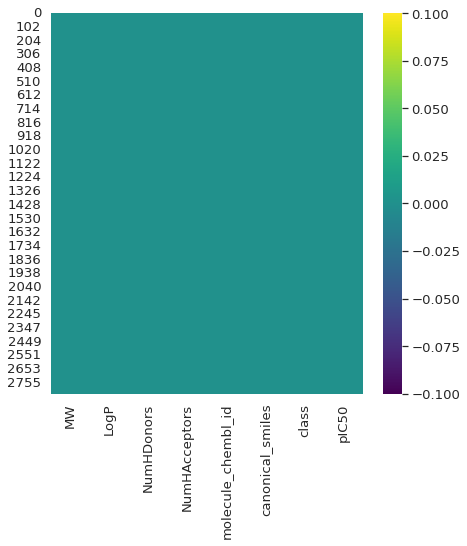

In [47]:
cols =df_final.columns
sns.heatmap(df_final[cols].isnull(), cmap='viridis')

<h4 id="2.4-|-handel missing data"><b>2.4 <span style="color:#4a8fdd">|</span> handel missing data</b></h4>




In [48]:
df_final.shape

(2835, 8)

<div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center> Dataset Basic Informations</center></h3>
<p>● The dataset consists of 2685 rows and 8 columns. </p>
<p>● We have 5 column as  floot column and 3 categorical column   .</p>
<p>● There is 76 null data inside columns and solved .</p>
<p>● No duplicate data in dataset .</p>

</div>
</div>

# 📌Data Analaysis & Visualization
in this part we will analays and versialize each part of data to be in near step from our goal then pased on deployed models we will sense best factior that affect on our bussiness goal



<h4 id="3.3-|- distplot for neumerical data"><b>3.3 <span style="color:#4a8fdd">|</span> distplot for neumerical data</b></h4>



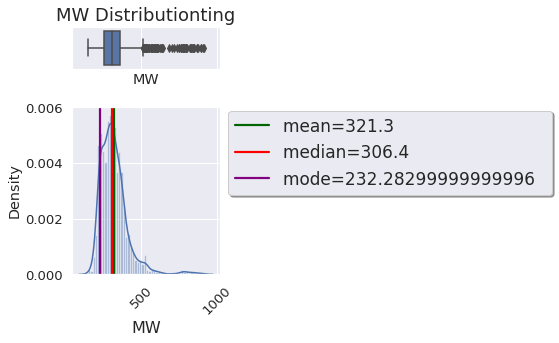

In [49]:
numerical_plotting(df_final,'MW','MW Distributionting','  ')

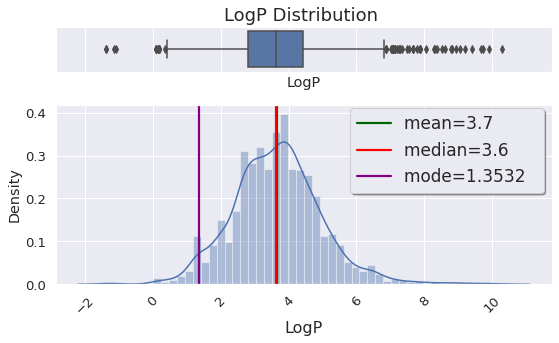

In [50]:
numerical_plotting(df_final,'LogP','LogP Distribution ','  ')

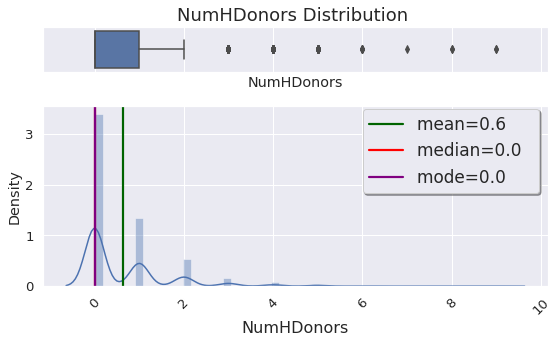

In [51]:
numerical_plotting(df_final,'NumHDonors','NumHDonors Distribution ','  ')

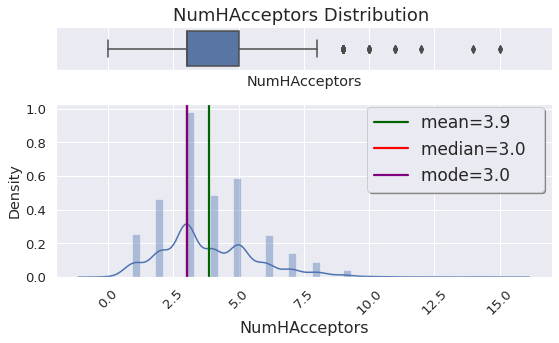

In [52]:
numerical_plotting(df_final,'NumHAcceptors','NumHAcceptors Distribution ','  ')


<h4 id="3.4-|- Histogram"><b>3.4 <span style="color:#4a8fdd">|</span>    Histogram </b></h4>


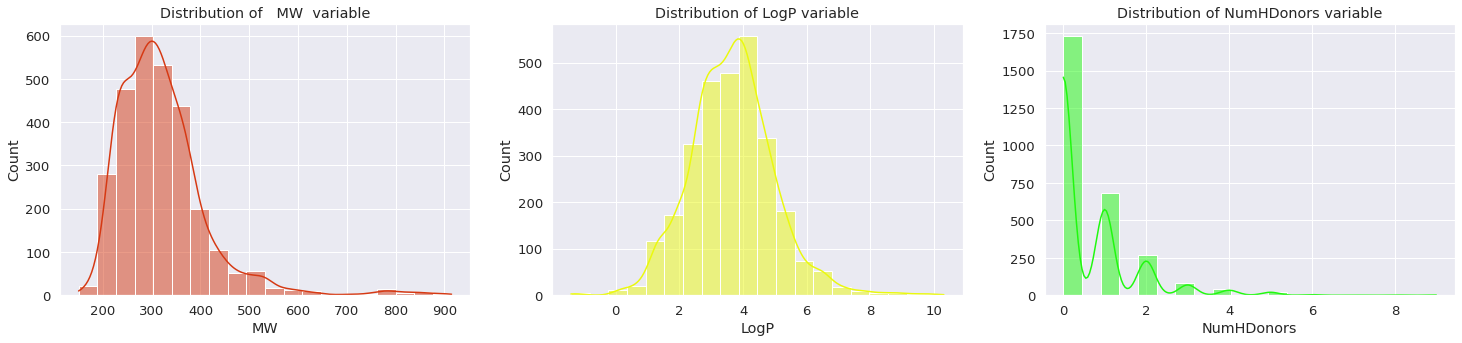

In [53]:
fig, axes = plt.subplots(1, 3, figsize = (25, 5))
ax = axes.flatten()
sns.histplot(ax = axes[0], x = df_final["MW"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of   MW  variable");
sns.histplot(ax = axes[1], x = df_final["LogP"], bins = 20, kde = True, color = "#EAF90E").set(title = "Distribution of LogP variable");
sns.histplot(ax = axes[2], x = df_final["NumHDonors"], bins = 20, kde = True, color = "#20F90E").set(title = "Distribution of NumHDonors variable");


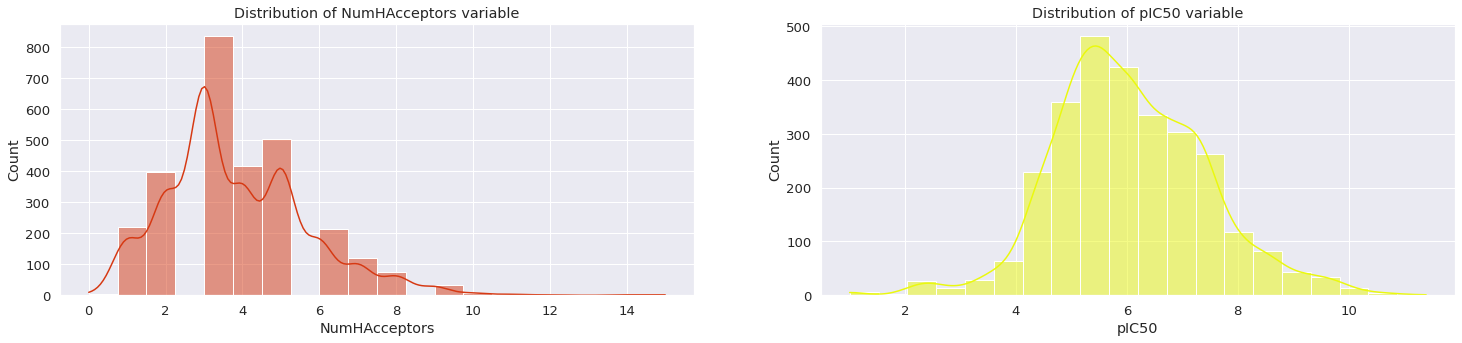

In [54]:
fig, axes = plt.subplots(1, 2, figsize = (25, 5))
ax = axes.flatten()
sns.histplot(ax = axes[0], x = df_final["NumHAcceptors"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of NumHAcceptors variable");
sns.histplot(ax = axes[1], x = df_final["pIC50"], bins = 20, kde = True, color = "#EAF90E").set(title = "Distribution of pIC50 variable");


<div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center> Basic Numeric analaysis</center></h3>
<p>● Most of Data is  Normaly Distributed</p>
</div>
</div>

<h4 id="3.5-|- Count Plot"><b>3.5 <span style="color:#4a8fdd">|</span>    Count  Blot </b></h4>

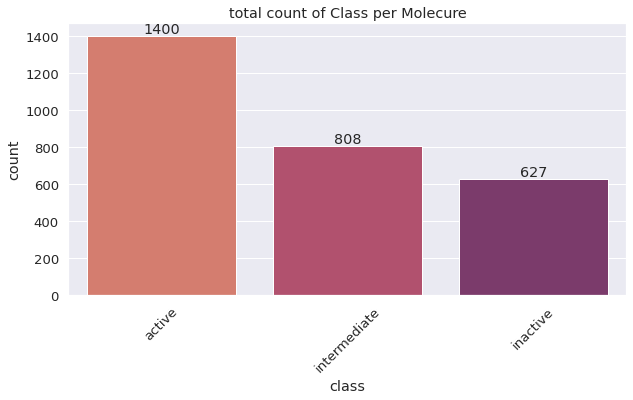

In [55]:
categorical_plotting(df_final,'class','total count of Class per Molecure')



1.   Data is not Balaced nedd to be Balanced befoure fitting model 
2.   We have 1323 active compounds which may be good to search for drugs



<h4 id="3.5-|- Histogram"><b>3.5 <span style="color:#4a8fdd">|</span>    Box Blot </b></h4>

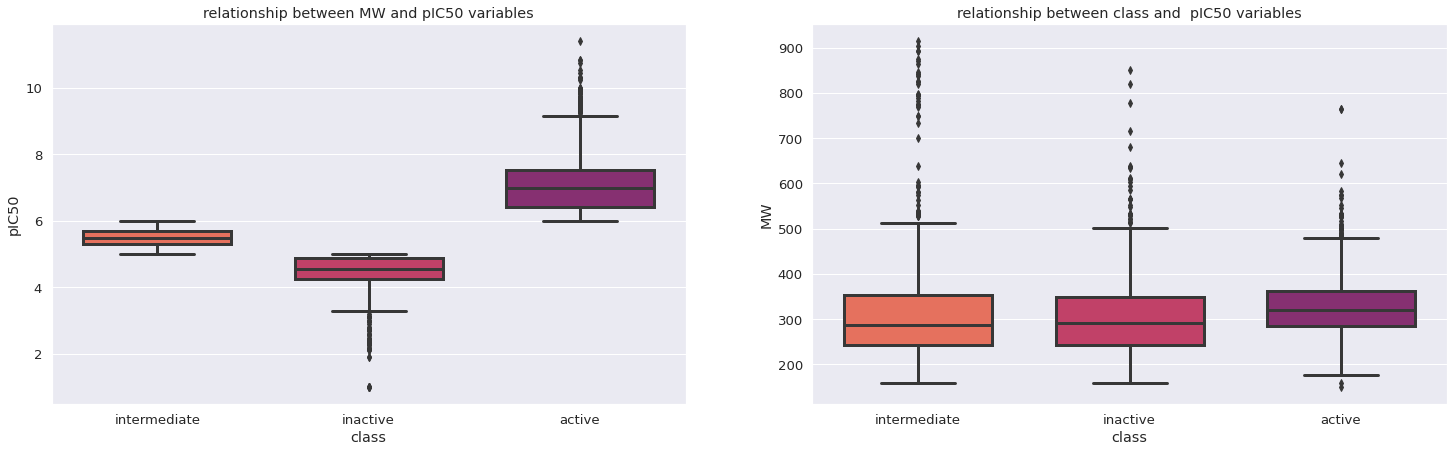

In [56]:
 
fig, axes = plt.subplots(1, 2, figsize = (25, 7))

sns.boxplot(ax = axes[0], x = "class", y = "pIC50", data = df_final, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[1].set_title("relationship between class and  pIC50 variables");

sns.boxplot(ax = axes[1], x = "class", y = "MW", data = df_final, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')
axes[0].set_title("relationship between MW and pIC50 variables"); 

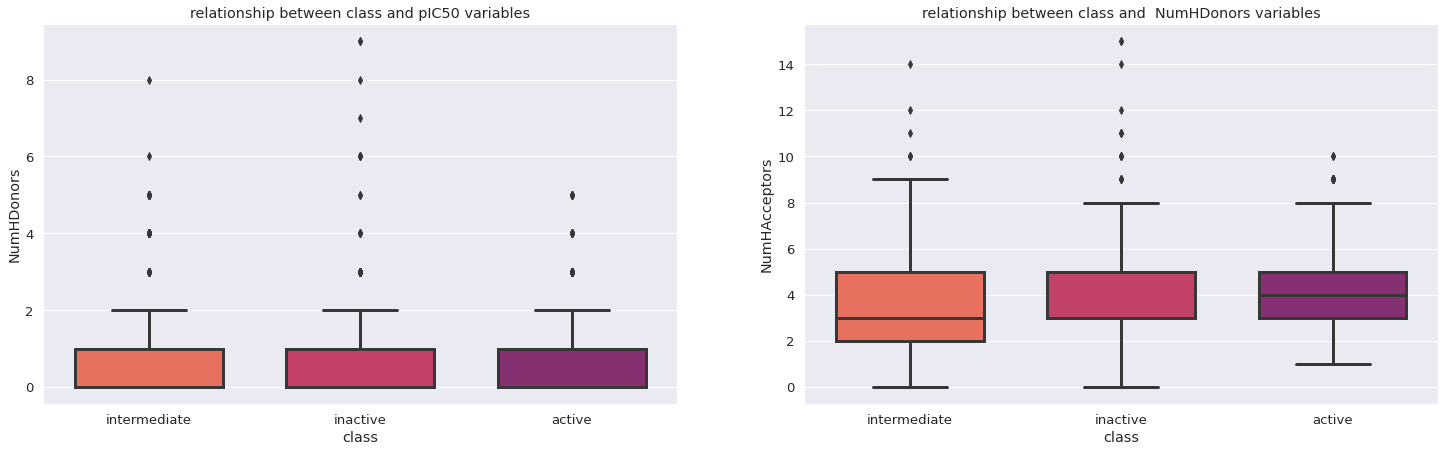

In [57]:
 
fig, axes = plt.subplots(1, 2, figsize = (25, 7))

sns.boxplot(ax = axes[0], x = "class", y = "NumHDonors", data = df_final, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare');
axes[1].set_title("relationship between class and  NumHDonors variables");

sns.boxplot(ax = axes[1], x = "class", y = "NumHAcceptors", data = df_final, width = 0.7, orient = "v", fliersize = 5,
            saturation = 1, linewidth = 3,palette='flare')
axes[0].set_title("relationship between class and pIC50 variables"); 



<h4 id="3.6-|- sactter Plot"><b>3.6 <span style="color:#4a8fdd">|</span>  sactter Plot</b></h4>

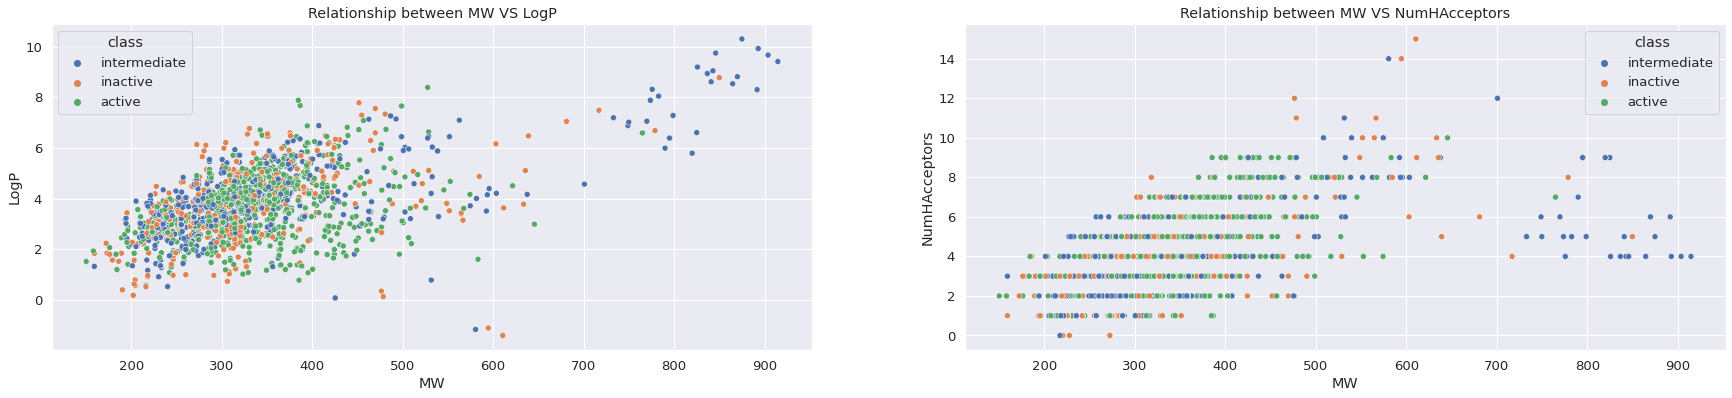

In [58]:
fig, axes = plt.subplots(1, 2, figsize = (30, 6))
axes = axes.flatten()
sns.scatterplot(ax = axes[0], x = "MW", y = "LogP", data = df_final, color = "#000000",hue='class',
                ).set(title = "Relationship between MW VS LogP");

sns.scatterplot(ax = axes[1], x = "MW", y = "NumHAcceptors", data = df_final,hue='class',
                color = "#E9F709").set(title = "Relationship between MW VS NumHAcceptors");



<h4 id="3.9-|- pi Plot"><b>3.9 <span style="color:#4a8fdd">|</span>  pi Plot </b></h4>

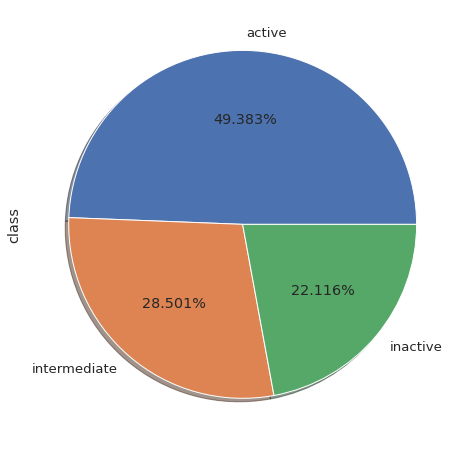

In [59]:
plt.figure(figsize = [8, 8], clear = True, )
df_final["class"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);


<h4 id="3.10-|- pair Plot"><b>3.10 <span style="color:#4a8fdd">|</span>  pair Plot </b></h4>

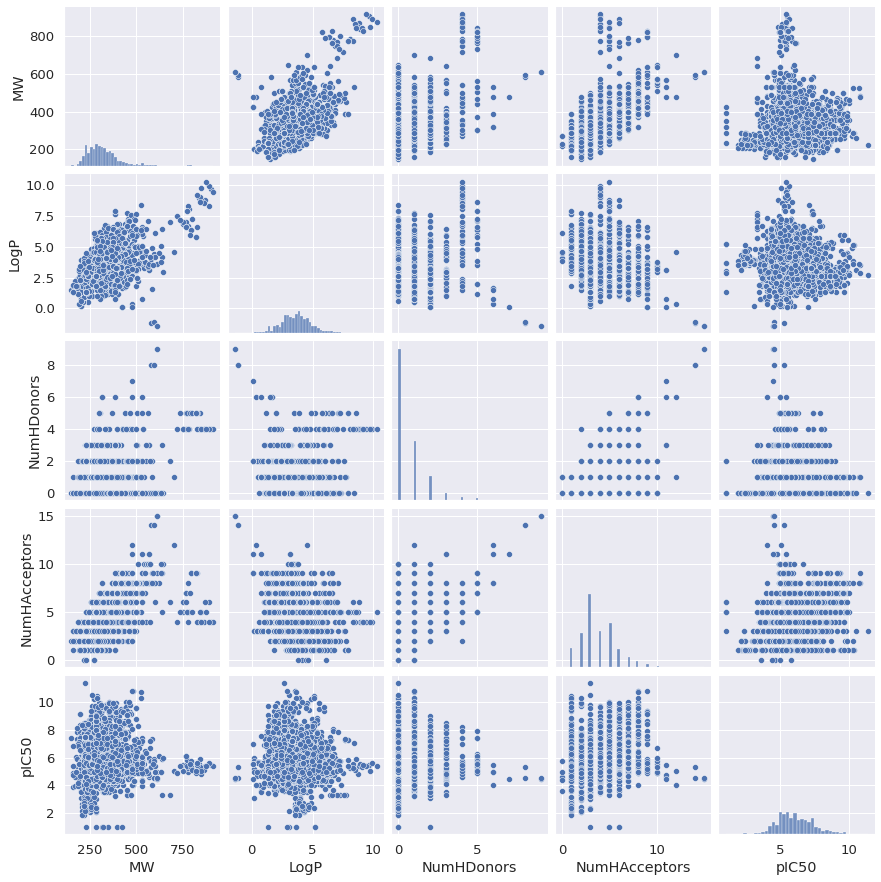

In [60]:
sns.pairplot(df_final)

In [61]:
df_final.corr()

MW      LogP  NumHDonors  NumHAcceptors     pIC50
MW             1.000000  0.513105    0.352767       0.585341  0.080620
LogP           0.513105  1.000000   -0.043951      -0.211194 -0.082308
NumHDonors     0.352767 -0.043951    1.000000       0.287396 -0.071420
NumHAcceptors  0.585341 -0.211194    0.287396       1.000000  0.220441
pIC50          0.080620 -0.082308   -0.071420       0.220441  1.000000

<AxesSubplot:>

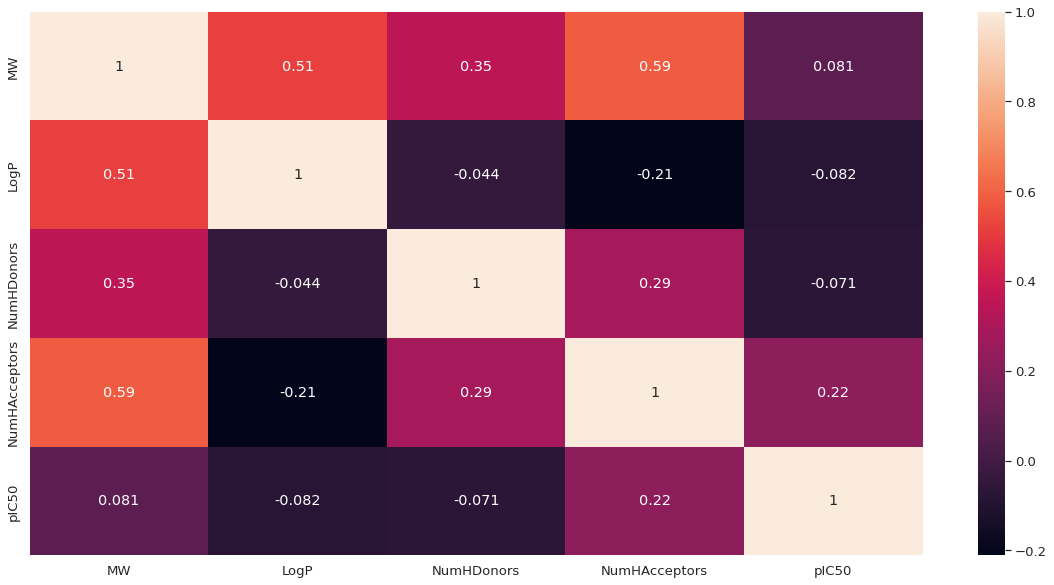

In [62]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df_final.corr(),annot=True)


<div class="text_cell_render border-box-sizing rendered_html">
<div style="border-radius: 10px;
            border : black solid;
            background-color: #34baeb;
            font-size:110%;
            text-align: left">

<h3 style="; border:0; border-radius: 10px; font-weight: bold; color:black"><center>Big Attention</center></h3>
<p>●  NO Multicollinearity    detected   
 </p>
<p>● ther are positive corrolation between  MW and NumHAcceptors and LogP .</p>


</div>
</div>

# 📌Step 4

*   Calculate molecure Disriptors




<h4 id="4.1-|- pair Plot"><b>4.1 <span style="color:#4a8fdd">|</span>   Download Padel Descriptor
 </b></h4>


*   it is software to calculate  molecular descriptors, which are numerical values that can be used to characterize the properties of a molecule




In [63]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh


--2023-01-15 12:42:21--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-01-15 12:42:21--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.07s   

2023-01-15 12:42:23 (333 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-01-15 12:42:23--  https://github

In [64]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf


<h4 id="4.2-|- pair Plot"><b>4.2 <span style="color:#4a8fdd">|</span>   Calculate Molecure  Descriptor
 </b></h4>






In [65]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df_final[selection]
# df3_selection.to_csv('/content/drive/MyDrive/datasets/bioactvitydata-omdin/molecule.smi', sep='\t', index=False, header=False)
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [66]:

! cat 'molecule.smi' | head -5

CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12	CHEMBL341591
C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021


In [67]:
! cat 'molecule.smi' | wc -l

2835


In [68]:
#start calculation
! bash padel.sh

Processing CHEMBL113637 in molecule.smi (4/2835). 
Processing CHEMBL341591 in molecule.smi (1/2835). 
Processing CHEMBL2111947 in molecule.smi (2/2835). 
Processing CHEMBL431859 in molecule.smi (3/2835). 
Processing CHEMBL112021 in molecule.smi (5/2835). Average speed: 3.42 s/mol.
Processing CHEMBL324070 in molecule.smi (6/2835). Average speed: 1.75 s/mol.
Processing CHEMBL41761 in molecule.smi (7/2835). Average speed: 1.27 s/mol.
Processing CHEMBL111868 in molecule.smi (8/2835). Average speed: 0.97 s/mol.
Processing CHEMBL111888 in molecule.smi (9/2835). Average speed: 0.81 s/mol.
Processing CHEMBL112074 in molecule.smi (10/2835). Average speed: 0.69 s/mol.
Processing CHEMBL324326 in molecule.smi (11/2835). Average speed: 0.62 s/mol.
Processing CHEMBL37321 in molecule.smi (12/2835). Average speed: 0.55 s/mol.
Processing CHEMBL353068 in molecule.smi (13/2835). Average speed: 0.50 s/mol.
Processing CHEMBL41066 in molecule.smi (14/2835). Average speed: 0.46 s/mol.
Processing CHEMBL166709

In [69]:
! cat padel.sh


java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [70]:
# #copy data to my drive 
# cp '/content/descriptors_output.csv'  '/content/drive/MyDrive/datasets/bioactvitydata-omdin/' 

#📌 Data Preparing

In [71]:
#prepare x matrix 
df_x = pd.read_csv('/content/descriptors_output.csv')
df_x 

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL113637           1           1           1           0   
1      CHEMBL431859           1           1           1           0   
2      CHEMBL341591           1           1           1           1   
3     CHEMBL2111947           1           1           1           1   
4      CHEMBL112021           1           1           1           0   
...             ...         ...         ...         ...         ...   
2830  CHEMBL4874928           1           1           1           0   
2831  CHEMBL4852023           1           1           1           0   
2832       CHEMBL75           1           1           1           0   
2833     CHEMBL1444           1           1           0           0   
2834  CHEMBL1200374           1           1           1           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  \
0              0           0           0           0           0           1   
1              0           0           0           0           0           1   
2              0           0           0           0           0           1   
3              0           0           0           0           0           1   
4              0           0           0           0           0           1   
...          ...         ...         ...         ...         ...         ...   
2830           0           0           0           0           0           1   
2831           0           0           0           0           0           1   
2832           0           0           0           0           0           1   
2833           0           0           0           0           0           1   
2834           0           0           0           0           0           1   

      PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  \
0               1            1            1            0            1   
1               1            1            1            0            1   
2               1            1            1            0            1   
3               1            1            1            0            1   
4               1            1            1            0            1   
...           ...          ...          ...          ...          ...   
2830            1            1            1            0            0   
2831            1            1            1            0            0   
2832            1            1            1            0            1   
2833            1            1            1            0            1   
2834            1            1            1            0            0   

      PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  \
0               1            0            0            0            0   
1               1            0            0            0            0   
2               0            0            0            1            0   
3               0            0            0            1            0   
4               1            0            0            0            0   
...           ...          ...          ...          ...          ...   
2830            0            0            0            1            0   
2831            0            0            0            1            0   
2832            1            1            0            1            1   
2833            1            1            0            0            0   
2834            0            0            0            1            1   

      PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...      

#📌 Data Preperation & spliting

In [72]:
df_x= df_x.drop(['Name'], axis=True)
df_x

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           1           0           0   
3              1           1           1           1           0           0   
4              1           1           1           0           0           0   
...          ...         ...         ...         ...         ...         ...   
2830           1           1           1           0           0           0   
2831           1           1           1           0           0           0   
2832           1           1           1           0           0           0   
2833           1           1           0           0           0           0   
2834           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0              0           0           0           1            1   
1              0           0           0           1            1   
2              0           0           0           1            1   
3              0           0           0           1            1   
4              0           0           0           1            1   
...          ...         ...         ...         ...          ...   
2830           0           0           0           1            1   
2831           0           0           0           1            1   
2832           0           0           0           1            1   
2833           0           0           0           1            1   
2834           0           0           0           1            1   

      PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0               1            1            0            1            1   
1               1            1            0            1            1   
2               1            1            0            1            0   
3               1            1            0            1            0   
4               1            1            0            1            1   
...           ...          ...          ...          ...          ...   
2830            1            1            0            0            0   
2831            1            1            0            0            0   
2832            1            1            0            1            1   
2833            1            1            0            1            1   
2834            1            1            0            0            0   

      PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            1            0            0   
3               0            0            1            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
2830            0            0            1            0            0   
2831            0            0            1            0            0   
2832            1            0            1            1            1   
2833            1            0            0            0            0   
2834            0            0            1            1            0   

      PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0               0            0            1            0            0   
1               0            0            1            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...       

In [73]:
#get y axis that from df_final column (pci)
df_y = df_final['pIC50']
df_y

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
2831    5.102373
2832    5.431798
2833    5.619789
2834    7.638272
2835    9.000000
Name: pIC50, Length: 2835, dtype: float64

In [74]:
#printing shape of our data set
df_x.shape, df_y.shape

((2835, 881), (2835,))

In [75]:
final =pd.concat([df_x,df_y],axis=1)
final

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0            1.0         1.0         1.0         0.0         0.0         0.0   
1            1.0         1.0         1.0         0.0         0.0         0.0   
2            1.0         1.0         1.0         1.0         0.0         0.0   
3            1.0         1.0         1.0         1.0         0.0         0.0   
4            1.0         1.0         1.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
2831         1.0         1.0         1.0         0.0         0.0         0.0   
2832         1.0         1.0         1.0         0.0         0.0         0.0   
2833         1.0         1.0         0.0         0.0         0.0         0.0   
2834         1.0         1.0         1.0         0.0         0.0         0.0   
2835         NaN         NaN         NaN         NaN         NaN         NaN   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0            0.0         0.0         0.0         1.0          1.0   
1            0.0         0.0         0.0         1.0          1.0   
2            0.0         0.0         0.0         1.0          1.0   
3            0.0         0.0         0.0         1.0          1.0   
4            0.0         0.0         0.0         1.0          1.0   
...          ...         ...         ...         ...          ...   
2831         0.0         0.0         0.0         1.0          1.0   
2832         0.0         0.0         0.0         1.0          1.0   
2833         0.0         0.0         0.0         1.0          1.0   
2834         0.0         0.0         0.0         1.0          1.0   
2835         NaN         NaN         NaN         NaN          NaN   

      PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0             1.0          1.0          0.0          1.0          1.0   
1             1.0          1.0          0.0          1.0          1.0   
2             1.0          1.0          0.0          1.0          0.0   
3             1.0          1.0          0.0          1.0          0.0   
4             1.0          1.0          0.0          1.0          1.0   
...           ...          ...          ...          ...          ...   
2831          1.0          1.0          0.0          0.0          0.0   
2832          1.0          1.0          0.0          1.0          1.0   
2833          1.0          1.0          0.0          1.0          1.0   
2834          1.0          1.0          0.0          0.0          0.0   
2835          NaN          NaN          NaN          NaN          NaN   

      PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0             0.0          0.0          0.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             0.0          0.0          1.0          0.0          0.0   
3             0.0          0.0          1.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
2831          0.0          0.0          1.0          0.0          0.0   
2832          1.0          0.0          1.0          1.0          1.0   
2833          1.0          0.0          0.0          0.0          0.0   
2834          0.0          0.0          1.0          1.0          0.0   
2835          NaN          NaN          NaN          NaN          NaN   

      PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0             0.0          0.0          1.0          0.0          0.0   
1             0.0          0.0          1.0          0.0          0.0   
2             0.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
...           ...       

In [76]:
final.dropna(inplace=True)

In [77]:
final

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0            1.0         1.0         1.0         0.0         0.0         0.0   
1            1.0         1.0         1.0         0.0         0.0         0.0   
2            1.0         1.0         1.0         1.0         0.0         0.0   
3            1.0         1.0         1.0         1.0         0.0         0.0   
4            1.0         1.0         1.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
2830         1.0         1.0         1.0         0.0         0.0         0.0   
2831         1.0         1.0         1.0         0.0         0.0         0.0   
2832         1.0         1.0         1.0         0.0         0.0         0.0   
2833         1.0         1.0         0.0         0.0         0.0         0.0   
2834         1.0         1.0         1.0         0.0         0.0         0.0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  \
0            0.0         0.0         0.0         1.0          1.0   
1            0.0         0.0         0.0         1.0          1.0   
2            0.0         0.0         0.0         1.0          1.0   
3            0.0         0.0         0.0         1.0          1.0   
4            0.0         0.0         0.0         1.0          1.0   
...          ...         ...         ...         ...          ...   
2830         0.0         0.0         0.0         1.0          1.0   
2831         0.0         0.0         0.0         1.0          1.0   
2832         0.0         0.0         0.0         1.0          1.0   
2833         0.0         0.0         0.0         1.0          1.0   
2834         0.0         0.0         0.0         1.0          1.0   

      PubchemFP11  PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  \
0             1.0          1.0          0.0          1.0          1.0   
1             1.0          1.0          0.0          1.0          1.0   
2             1.0          1.0          0.0          1.0          0.0   
3             1.0          1.0          0.0          1.0          0.0   
4             1.0          1.0          0.0          1.0          1.0   
...           ...          ...          ...          ...          ...   
2830          1.0          1.0          0.0          0.0          0.0   
2831          1.0          1.0          0.0          0.0          0.0   
2832          1.0          1.0          0.0          1.0          1.0   
2833          1.0          1.0          0.0          1.0          1.0   
2834          1.0          1.0          0.0          0.0          0.0   

      PubchemFP16  PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  \
0             0.0          0.0          0.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             0.0          0.0          1.0          0.0          0.0   
3             0.0          0.0          1.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
2830          0.0          0.0          1.0          0.0          0.0   
2831          0.0          0.0          1.0          0.0          0.0   
2832          1.0          0.0          1.0          1.0          1.0   
2833          1.0          0.0          0.0          0.0          0.0   
2834          0.0          0.0          1.0          1.0          0.0   

      PubchemFP21  PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  \
0             0.0          0.0          1.0          0.0          0.0   
1             0.0          0.0          1.0          0.0          0.0   
2             0.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
...           ...       

In [78]:
final.to_csv('/content/drive/MyDrive/datasets/bioactvitydata-omdin/final.csv',index=False)

In [79]:
# final.reset_index(inplace = True)

In [80]:
x = final.drop(['pIC50'], axis=True)
y = final['pIC50']

In [81]:
# x.fillna(0, inplace=True)

In [82]:
check_nan = final.isna().values.any()
check_nan

False

In [83]:
x.shape

(2834, 881)

In [84]:
y.shape

(2834,)

# 📌 removing low variance features

In [85]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x = selection.fit_transform(x)

In [86]:
x.shape

(2834, 151)

In [87]:
y.shape

(2834,)

In [88]:
x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42,shuffle=True)

# 📌Models
**i will use below regression model  :-** 
1. Linear Regressor  .  
2. SVR    Regressor  .  
3. KNN    Regressor  .
4. RF     Regressor  .
5. Xgboost+Kfold  Regressor. 

<font size="4" >**linear regression** </font> 

In [82]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [83]:
y_pred       = lr.predict(x_test)
y_pred_train = lr.predict(x_train)
print("R2 using Linear Regression on test  Data  : {:.2f} %".format(np.round(r2_score(y_test, y_pred),4)*100))
print("R2 using Linear Regression on train Data : {:.2f} %".format(np.round(r2_score(y_train, y_pred_train),4)*100))

R2 using Linear Regression on test  Data  : -5406653322600978055168.00 %
R2 using Linear Regression on train Data : 23.79 %


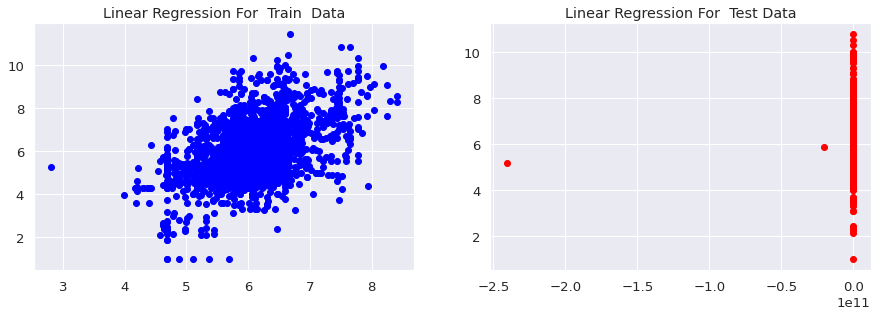

In [84]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title('Linear Regression For  Train  Data')
plt.scatter(lr.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title('Linear Regression For  Test Data')
plt.scatter(y_pred, y_test, color='red')

<function matplotlib.pyplot.show(close=None, block=None)>

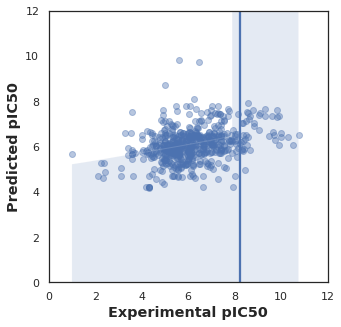

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [86]:
lr_df = pd.DataFrame({"actual":y_test,"predicted":y_pred,"differance ":y_test-y_pred})
lr_df.head(5)

actual  predicted  differance 
2089  7.876148   5.722925     2.153223
2807  4.903090   7.062296    -2.159206
1146  7.000000   6.058985     0.941015
1110  6.096910   6.826114    -0.729204
196   9.920819   6.043604     3.877215

<font size="4" >**SVR** </font> 

In [97]:
def svr_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'kernel'          : trial.suggest_categorical('kernel', ['linear','poly','rbf','sigmoid']),    
    'gamma'           : trial.suggest_loguniform('gamma', 1e-3, 5.0),
    'epsilon'         : trial.suggest_loguniform('epsilon', 1e-3, 5.0),
    'C'               :  trial.suggest_loguniform('C',1e-5,1e5),
    'degree'          : trial.suggest_categorical('degree', [1,3,5]),
    'max_iter'        : trial.suggest_categorical('max_iter', [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]), 
    }
    #creat model anf pass parameters 
    model =SVR(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse


In [98]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(svr_optuna, n_trials=200)

[I 2023-01-15 11:47:18,643] A new study created in memory with name: no-name-78bc2e02-48f8-4d05-a9b6-d3968cab2d20
[I 2023-01-15 11:47:19,545] Trial 0 finished with value: 1.3942256443419019 and parameters: {'gamma': 3.1618852391004135, 'C': 8.483271528739774e-05}. Best is trial 0 with value: 1.3942256443419019.
[I 2023-01-15 11:47:20,546] Trial 1 finished with value: 1.3612855411293294 and parameters: {'gamma': 2.2594513507827405, 'C': 0.03905608543095469}. Best is trial 1 with value: 1.3612855411293294.
[I 2023-01-15 11:47:21,614] Trial 2 finished with value: 1.3896518387781627 and parameters: {'gamma': 0.0461526674388926, 'C': 448.38129227729246}. Best is trial 1 with value: 1.3612855411293294.
[I 2023-01-15 11:47:22,448] Trial 3 finished with value: 1.3943015488705721 and parameters: {'gamma': 0.15026185280404644, 'C': 1.1341699666572277e-05}. Best is trial 1 with value: 1.3612855411293294.
[I 2023-01-15 11:47:23,264] Trial 4 finished with value: 1.3482058899036973 and parameters: {

In [99]:

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 1.2420584835577015
  Params: 
    gamma: 0.13762276893443795
    C: 0.6953570215050646


In [101]:
svr_best = SVR(kernel='rbf',C=2407.506103718869, degree=5,
               epsilon=1.064021657201985, gamma=0.17058911215465283, max_iter=10000)
# svr_best = SVR(C=0.6953570215050646,
#                 gamma=0.13762276893443795, )


svr_best.fit(x_train,y_train)
y_pred_svr         = svr_best.predict(x_test)
y_pred_train_svr   = svr_best.predict(x_train)
print("R2 using SVR Regression on test  Data  : {:.2f} %".format(np.round(r2_score(y_test, y_pred_svr),4)*100))
print("R2 using SVR Regression on train Data : {:.2f} %".format(np.round(r2_score(y_train, y_pred_train_svr),4)*100))

R2 using SVR Regression on test  Data  : 17.03 %
R2 using SVR Regression on train Data : 42.14 %


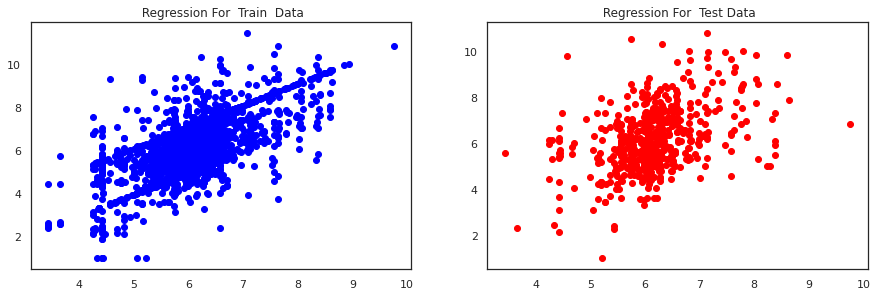

In [102]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(svr_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred_svr, y_test, color='red')

<function matplotlib.pyplot.show(close=None, block=None)>

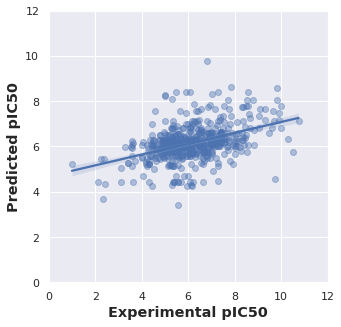

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

ax = sns.regplot(y_test, y_pred_svr, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [107]:
svr_df = pd.DataFrame({"actual":y_test ,"predicted":y_pred_svr,"differance ":np.round(y_test-y_pred_svr,2)})
svr_df.tail(5)

actual  predicted  differance 
163   6.677781   5.741803         0.94
1883  4.950394   5.689190        -0.74
252   6.698970   5.721586         0.98
2086  5.832092   6.032469        -0.20
1778  6.823909   5.572089         1.25

<font size="4" >**KNN Regressor** </font> 

In [89]:
def knnregressors_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'n_neighbors'     : trial.suggest_categorical('n_neighbors', [1,3,5,7,9,11,13,15]), 
    'weights'         : trial.suggest_categorical('weights', ['uniform','distance']),
    'algorithm'       : trial.suggest_categorical('algorithm',['auto','ball_tree','kd_tree','brute']),
    'leaf_size'       : trial.suggest_int('leaf_size', 30, 150),
    'p'               : trial.suggest_int('p', 2, 50),
    
    }
    #creat model anf pass parameters 
    model = KNeighborsRegressor(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse


In [90]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(knnregressors_optuna, n_trials=200)

[I 2023-01-15 12:45:39,279] A new study created in memory with name: no-name-03b535e6-243c-4da5-a385-7824f91ef2dc
[I 2023-01-15 12:45:42,038] Trial 0 finished with value: 1.480046408903723 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 115, 'p': 31}. Best is trial 0 with value: 1.480046408903723.
[I 2023-01-15 12:45:44,773] Trial 1 finished with value: 1.480046408903723 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 84, 'p': 28}. Best is trial 0 with value: 1.480046408903723.
[I 2023-01-15 12:45:48,806] Trial 2 finished with value: 1.1535459007542384 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 128, 'p': 49}. Best is trial 2 with value: 1.1535459007542384.
[I 2023-01-15 12:45:53,172] Trial 3 finished with value: 1.416006504553324 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 101, 'p': 27}. Best i

In [91]:

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 1.1055048974409478
  Params: 
    n_neighbors: 15
    weights: uniform
    algorithm: brute
    leaf_size: 76
    p: 20


In [92]:
knn_best = KNeighborsRegressor(n_neighbors=15,weights='uniform',
                               algorithm='brute',leaf_size=76,p=20)


knn_best.fit(x_train,y_train)
y_pred_knn = knn_best.predict(x_test)
y_pred_train_knn   = knn_best.predict(x_train)
print("R2 using KNN  Regression on test  Data  : {:.2f} %".format(np.round(r2_score(y_test, y_pred_knn),4)*100))
print("R2 using KNN Regression on train Data : {:.2f} %".format(np.round(r2_score(y_train, y_pred_train_knn),4)*100))

R2 using KNN  Regression on test  Data  : 35.54 %
R2 using KNN Regression on train Data : 37.63 %


In [93]:
knn_df = pd.DataFrame({"predicted":y_pred_knn,"actual":y_test,"differance": y_test-y_pred_knn})
knn_df.head(5)

predicted    actual  differance
2089   5.528055  7.876148    2.348094
2807   5.930300  4.903090   -1.027211
1146   6.184390  7.000000    0.815610
1110   6.405586  6.096910   -0.308676
196    6.553733  9.920819    3.367086

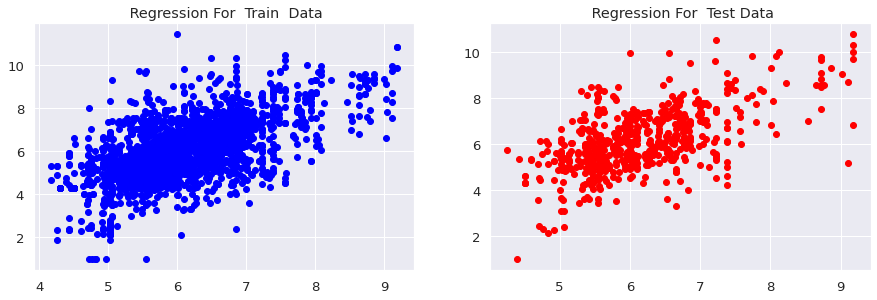

In [94]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(knn_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred_knn, y_test, color='red')

<function matplotlib.pyplot.show(close=None, block=None)>

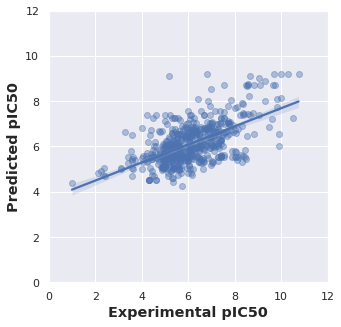

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

ax = sns.regplot(y_test, y_pred_knn, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

<font size="4" >**Random forest Regressor** </font> 

In [96]:
def randomforest_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    params = {

        'criterion'        : trial.suggest_categorical('criterion', ['squared_error', 'absolute_error', 'poisson']),
        'bootstrap'        : trial.suggest_categorical('bootstrap',['True','False']),
        'max_depth'        : trial.suggest_int('max_depth', 1, 30000),
        'max_features'     : trial.suggest_categorical('max_features', ['auto', 'sqrt','log2']),
        'max_leaf_nodes'   : trial.suggest_int('max_leaf_nodes', 1, 30000),
        'n_estimators'     : trial.suggest_int('n_estimators', 30, 1000),


    }
    #creat model anf pass parameters 
    model = RandomForestRegressor(**params) 
    model.fit(x_train, y_train) 
    predection = model.predict(x_test)
    rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse


In [97]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(randomforest_optuna, n_trials=100)

[I 2023-01-15 13:03:47,550] A new study created in memory with name: no-name-39392974-a164-45ff-b8b4-e50bd84d5ba8
[I 2023-01-15 13:03:50,259] Trial 0 finished with value: 1.1225288410715109 and parameters: {'criterion': 'squared_error', 'bootstrap': 'False', 'max_depth': 11379, 'max_features': 'sqrt', 'max_leaf_nodes': 23024, 'n_estimators': 431}. Best is trial 0 with value: 1.1225288410715109.
[I 2023-01-15 13:04:01,560] Trial 1 finished with value: 1.1160124063997423 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'False', 'max_depth': 4125, 'max_features': 'log2', 'max_leaf_nodes': 25281, 'n_estimators': 266}. Best is trial 1 with value: 1.1160124063997423.
[I 2023-01-15 13:04:59,128] Trial 2 finished with value: 1.1173407907041966 and parameters: {'criterion': 'absolute_error', 'bootstrap': 'True', 'max_depth': 3774, 'max_features': 'sqrt', 'max_leaf_nodes': 8988, 'n_estimators': 888}. Best is trial 1 with value: 1.1160124063997423.
[I 2023-01-15 13:05:00,883] Trial 3 

In [98]:

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value: 1.0990845118251193
  Params: 
    criterion: absolute_error
    bootstrap: False
    max_depth: 13
    max_features: log2
    max_leaf_nodes: 18621
    n_estimators: 628


In [99]:
rf_best = RandomForestRegressor(bootstrap= False,max_depth=13,criterion='absolute_error',
                                max_features='log2',
                                max_leaf_nodes= 18621,n_estimators= 628)

rf_best.fit(x_train,y_train)
y_pred_rf = rf_best.predict(x_test)
y_pred_train_rf   = rf_best.predict(x_train)
print("R2 using Random Forest  Regression on test  Data  : {:.2f} %".format(np.round(r2_score(y_test, y_pred_rf),4)*100))
print("R2 using Random Forest on train Data : {:.2f} %".format(np.round(r2_score(y_train, y_pred_train_rf),4)*100))

R2 using Random Forest  Regression on test  Data  : 32.87 %
R2 using Random Forest on train Data : 58.53 %


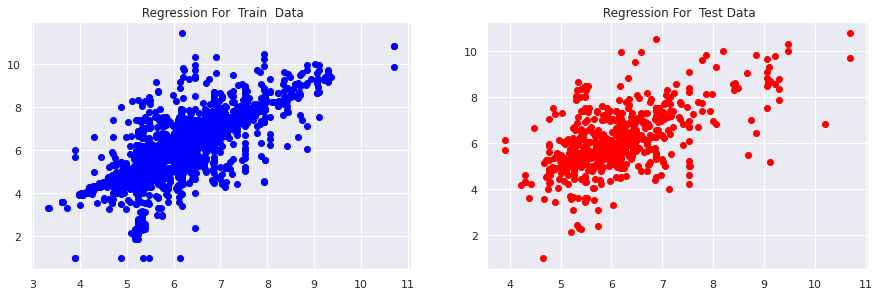

In [100]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(rf_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred_rf, y_test, color='red')

In [101]:
rf_best.feature_importances_

array([0.01925405, 0.01634549, 0.00511863, 0.00468822, 0.0128003 ,
       0.00800429, 0.00394724, 0.00618441, 0.01016415, 0.01251577,
       0.01428887, 0.01543263, 0.00265639, 0.00362461, 0.00782568,
       0.00790355, 0.00202863, 0.01166688, 0.00589729, 0.01170358,
       0.0073121 , 0.00412765, 0.00908942, 0.01147769, 0.00190903,
       0.00561334, 0.00882514, 0.01225805, 0.00455299, 0.00636806,
       0.01941451, 0.00804902, 0.00266618, 0.00572862, 0.00793492,
       0.00270325, 0.00323579, 0.00982972, 0.00511708, 0.01174697,
       0.00214269, 0.0125534 , 0.00156144, 0.00899203, 0.00304143,
       0.00444494, 0.00249259, 0.00515286, 0.00580797, 0.00413652,
       0.00635949, 0.00633476, 0.00521971, 0.00560013, 0.00702879,
       0.00209969, 0.00956306, 0.00212583, 0.0034788 , 0.00635535,
       0.0044221 , 0.00547402, 0.00944656, 0.00593197, 0.0102023 ,
       0.00723053, 0.00472946, 0.00244719, 0.00265047, 0.00652084,
       0.00520631, 0.0140885 , 0.0055908 , 0.01299043, 0.00853

In [102]:
rf_df = pd.DataFrame({"actual":y_test,"predicted":y_pred_rf,"differance": y_test-y_pred_rf})
rf_df.head(5)

actual  predicted  differance
2089  7.876148   6.145785    1.730363
2807  4.903090   6.163747   -1.260657
1146  7.000000   6.529649    0.470351
1110  6.096910   6.167368   -0.070458
196   9.920819   6.587731    3.333088

<font size="4" >**XGboost+Kfold** </font> 

In [103]:
import xgboost as xgb

In [104]:
def xgboost_optuna (trial,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    #define matrix for xfb
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dvalid = xgb.DMatrix(x_test, label=y_test)
    #define parameters
    params = {
    'objective'        : 'reg:squarederror',
    'min_child_weight' : trial.suggest_int('min_child_weight', 1, 100),
    'lambda'           : trial.suggest_loguniform('lambda', 1e-3, 5.0),
    'alpha'            : trial.suggest_loguniform('alpha', 1e-3, 5.0),
    'max_depth'        : trial.suggest_categorical('max_depth', [3,4,5,6,7]),
    'subsample'        : trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
    'learning_rate'    : trial.suggest_categorical('learning_rate', [0.001,0.01,0.05,0.1,0.2,0.25,0.3]),
    'n_estimators'     : trial.suggest_categorical('n_estimators', [300,400,500,1000,1500,2000,2500,3000]), 
    'colsample_bytree' : trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
    }
   
    kf = KFold(n_splits=7, random_state=42, shuffle=True)
    for idx in list(kf.split(x_train,y_train)):
        #creat model anf pass parameters 
        model = xgb.XGBRegressor(**params) 
        model.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=100, verbose=False) 
        predection = model.predict(x_test)
        rmse = mean_squared_error(y_test, predection, squared=False)
    return rmse

In [105]:
study = optuna.create_study(direction="minimize")
#start serach 
study.optimize(xgboost_optuna, n_trials=100)

[I 2023-01-15 14:39:43,619] A new study created in memory with name: no-name-274d713b-0b7e-4d90-818d-85519c16f961
[I 2023-01-15 14:39:58,098] Trial 0 finished with value: 1.1015145538205755 and parameters: {'min_child_weight': 88, 'lambda': 0.0220009272560056, 'alpha': 0.0024094422935714344, 'max_depth': 7, 'subsample': 0.4, 'learning_rate': 0.25, 'n_estimators': 400, 'colsample_bytree': 0.3}. Best is trial 0 with value: 1.1015145538205755.
[I 2023-01-15 14:42:53,295] Trial 1 finished with value: 1.2075172860303052 and parameters: {'min_child_weight': 25, 'lambda': 1.293911380099269, 'alpha': 0.40077622089200554, 'max_depth': 6, 'subsample': 0.7, 'learning_rate': 0.001, 'n_estimators': 2500, 'colsample_bytree': 0.6}. Best is trial 0 with value: 1.1015145538205755.
[I 2023-01-15 14:43:10,662] Trial 2 finished with value: 1.0834318739135258 and parameters: {'min_child_weight': 81, 'lambda': 1.3067485947509105, 'alpha': 0.03315220906261492, 'max_depth': 4, 'subsample': 0.8, 'learning_rate

In [106]:

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value: 1.0716397505898991
  Params: 
    min_child_weight: 20
    lambda: 0.0018726064875454237
    alpha: 0.1451554363337856
    max_depth: 6
    subsample: 0.4
    learning_rate: 0.01
    n_estimators: 2500
    colsample_bytree: 1.0


In [107]:
xgb_best = xgb.XGBRegressor(reg_lambda = 0.0018726064875454237,
                   alpha = 0.1451554363337856,
                   colsample_bytree = 1,
                   subsample = 0.4,
                   learning_rate = 0.01,
                   n_estimators = 2500,
                   max_depth = 6,
                   min_child_weight = 20)

In [108]:
xgb_best.fit(x_train, y_train)

[16:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=0.1451554363337856, learning_rate=0.01, max_depth=6,
             min_child_weight=20, n_estimators=2500,
             reg_lambda=0.0018726064875454237, subsample=0.4)

In [109]:

y_pred_xg         = xgb_best.predict(x_test)
y_pred_train_xg   = xgb_best.predict(x_train)
print("R2 using XGBoost  Regression on test  Data  : {:.2f} %".format(np.round(r2_score(y_test, y_pred_xg),4)*100))
print("R2 using XGBoost on train Data : {:.2f} %".format(np.round(r2_score(y_train, y_pred_train_xg),4)*100))

R2 using XGBoost  Regression on test  Data  : 36.30 %
R2 using XGBoost on train Data : 56.58 %


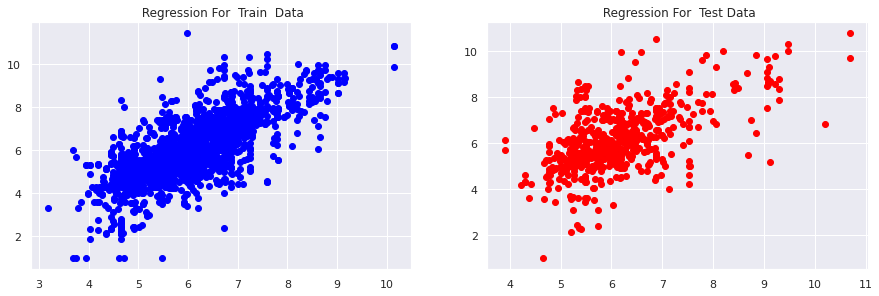

In [110]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title(' Regression For  Train  Data')
plt.scatter(xgb_best.predict(x_train), y_train, color='blue')
plt.subplot(2,2,2)
plt.title(' Regression For  Test Data')
plt.scatter(y_pred_rf, y_test, color='red')

In [111]:
knn_df = pd.DataFrame({"predicted":y_pred_xg,"actual_":y_test,"differance": y_test-y_pred_xg})
knn_df.head(5)

predicted   actual_  differance
2089   7.100167  7.876148    0.775982
2807   6.076813  4.903090   -1.173723
1146   6.365503  7.000000    0.634497
1110   5.815378  6.096910    0.281532
196    6.884873  9.920819    3.035946

In [112]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 12.4 MB/s 
     |████████████████████████████████| 297 kB 67.0 MB/s 
     |████████████████████████████████| 255.9 MB 34 kB/s 
     |████████████████████████████████| 96 kB 7.5 MB/s 
     |████████████████████████████████| 24.8 MB 1.4 MB/s 


In [113]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Defines and builds the lazy regressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(x_train, x_train, y_train, y_train)
models_test,predictions_test = clf.fit(x_train, x_test, y_train, y_test)

 95%|█████████▌| 40/42 [02:40<00:06,  3.17s/it]

[16:20:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [02:41<00:00,  3.84s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 95%|█████████▌| 40/42 [02:12<00:05,  2.92s/it]

[16:22:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [02:13<00:00,  3.19s/it]


In [114]:
# Performance table of the training set (90% subset)
predictions_train

Adjusted R-Squared  \
Model                                                        
GaussianProcessRegressor                              0.64   
DecisionTreeRegressor                                 0.64   
ExtraTreeRegressor                                    0.64   
ExtraTreesRegressor                                   0.64   
RandomForestRegressor                                 0.61   
BaggingRegressor                                      0.59   
MLPRegressor                                          0.54   
HistGradientBoostingRegressor                         0.51   
LGBMRegressor                                         0.51   
KNeighborsRegressor                                   0.43   
SVR                                                   0.40   
NuSVR                                                 0.39   
GradientBoostingRegressor                             0.38   
XGBRegressor                                          0.38   
LinearRegression                                      0.33   
TransformedTargetRegressor                            0.33   
Ridge                                                 0.33   
RidgeCV                                               0.32   
LassoCV                                               0.30   
ElasticNetCV                                          0.30   
HuberRegressor                                        0.30   
BayesianRidge                                         0.28   
LinearSVR                                             0.28   
LassoLarsCV                                           0.28   
LassoLarsIC                                           0.28   
SGDRegressor                                          0.27   
PoissonRegressor                                      0.26   
OrthogonalMatchingPursuit                             0.22   
OrthogonalMatchingPursuitCV                           0.22   
GammaRegressor                                        0.21   
TweedieRegressor                                      0.21   
AdaBoostRegressor                                     0.18   
LarsCV                                                0.06   
LassoLars                                            -0.07   
ElasticNet                                           -0.07   
Lasso                                                -0.07   
DummyRegressor                                       -0.07   
QuantileRegressor                                    -0.07   
PassiveAggressiveRegressor                           -0.65   
KernelRidge                                         -19.99   
Lars                                               -513.47   
RANSACRegressor               -103908437188781514162176.00   

                                                R-Squared            RMSE  \
Model                                                                       
GaussianProcessRegressor                             0.66            0.81   
DecisionTreeRegressor                                0.66            0.81   
ExtraTreeRegressor                                   0.66            0.81   
ExtraTreesRegressor                                  0.66            0.81   
RandomForestRegressor                                0.63            0.84   
BaggingRegressor                                     0.62            0.86   
MLPRegressor                                         0.57            0.91   
HistGradientBoostingRegressor                        0.54            0.94   
LGBMRegressor                                        0.54            0.94   
KNeighborsRegressor                                  0.46            1.02   
SVR                                                  0.44            1.04   
NuSVR                                                0.43            1.04   
GradientBoostingRegressor                            0.42            1.05   
XGBRegressor                                         0.42            1.05   
LinearRegression                                     0.38            1.10   
Tr

In [115]:
predictions_test

Adjusted R-Squared  \
Model                                                       
HistGradientBoostingRegressor                        0.15   
LGBMRegressor                                        0.15   
XGBRegressor                                         0.13   
GradientBoostingRegressor                            0.13   
NuSVR                                                0.12   
SVR                                                  0.12   
RandomForestRegressor                                0.08   
MLPRegressor                                         0.06   
BayesianRidge                                        0.05   
KNeighborsRegressor                                  0.05   
PoissonRegressor                                     0.05   
ElasticNetCV                                         0.04   
RidgeCV                                              0.04   
LassoCV                                              0.04   
BaggingRegressor                                     0.03   
LassoLarsIC                                          0.02   
Ridge                                                0.02   
LassoLarsCV                                          0.02   
HuberRegressor                                       0.02   
TweedieRegressor                                     0.01   
GammaRegressor                                       0.01   
TransformedTargetRegressor                           0.00   
LinearRegression                                     0.00   
LinearSVR                                           -0.00   
OrthogonalMatchingPursuit                           -0.01   
OrthogonalMatchingPursuitCV                         -0.01   
SGDRegressor                                        -0.03   
AdaBoostRegressor                                   -0.04   
LarsCV                                              -0.19   
ExtraTreesRegressor                                 -0.24   
DecisionTreeRegressor                               -0.28   
ExtraTreeRegressor                                  -0.29   
ElasticNet                                          -0.37   
DummyRegressor                                      -0.37   
LassoLars                                           -0.37   
Lasso                                               -0.37   
QuantileRegressor                                   -0.39   
PassiveAggressiveRegressor                          -1.10   
GaussianProcessRegressor                            -7.18   
KernelRidge                                        -26.38   
Lars                                             -2912.08   
RANSACRegressor               -83709644676927208816640.00   

                                                R-Squared            RMSE  \
Model                                                                       
HistGradientBoostingRegressor                        0.38            1.09   
LGBMRegressor                                        0.38            1.09   
XGBRegressor                                         0.36            1.10   
GradientBoostingRegressor                            0.36            1.10   
NuSVR                                                0.36            1.10   
SVR                                                  0.36            1.11   
RandomForestRegressor                                0.32            1.13   
MLPRegressor                                         0.31            1.14   
BayesianRidge                                        0.30            1.15   
KNeighborsRegressor                                  0.30            1.15   
PoissonRegressor                                     0.30            1.15   
ElasticNetCV                                         0.30            1.15   
RidgeCV                                              0.30            1.15   
LassoCV                                              0.30            1.15   
BaggingRegressor                                     0.29            1.16   
LassoLarsIC                                  

[(0.0, 10.0)]

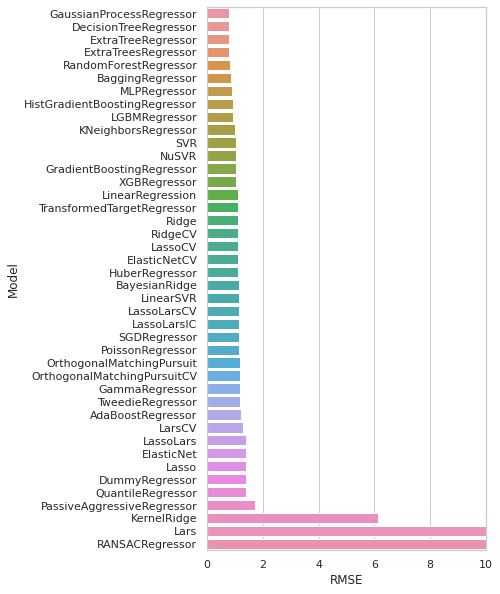

In [116]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
# from joblib import Parallel, delayed
# import joblib
  
  
# # Save the model as a pickle in a file
# joblib.dump(xgb_best, '/content/drive/MyDrive/model_result/games/games.pkl')